In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import pandas as pd

In [2]:
data=pd.read_csv('ex2data2.txt',sep=',',header=None)

In [3]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
X=data.iloc[:,0:2]
Y=data.iloc[:,2]
X_old=X

In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: 2, Length: 118, dtype: int64

In [6]:
pos=Y==1

In [7]:
neg=Y==0


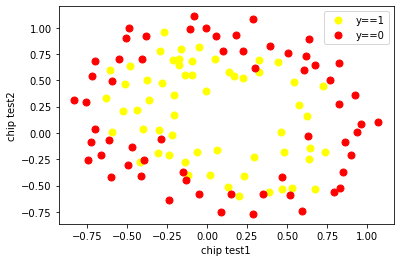

In [8]:
plt.plot(X[pos][0],X[pos][1],'o',lw=2,ms=7,color='yellow',label='y==1')
plt.plot(X[neg][0],X[neg][1],'o',lw=2,ms=7,color='red',label='y==0')
plt.xlabel('chip test1')
plt.ylabel('chip test2')
plt.legend()
plt.show()

In [9]:
m,n=X.shape

In [10]:
def mapfeature(X1,X2):
    out=np.ones((X1.shape[0],1))
    
    degree=6
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out=np.hstack((out,((X1**(i-j))*(X2**j))[:,np.newaxis]))
    return out
            
            

In [11]:
X=np.array(X)

In [12]:
X=mapfeature(X[:,0],X[:,1])

In [13]:
X.shape

(118, 28)

In [14]:
intial_theta=np.zeros(X.shape[1])

In [15]:
lamda=1

In [16]:
def sigmoid(z):
    temp=-z
    temp=np.exp(temp)
    temp=1+temp
    temp=1.0/temp
    return temp
    

In [17]:
def costfunctionreg(theta,X,Y,lamda):
    m,n=X.shape
    theta=theta[:,np.newaxis]
    Y=Y[:,np.newaxis]
    temp=X@theta
    temp=sigmoid(temp)
    J=Y.T@np.log(temp)+((1-Y).T)@np.log(1-temp)
    J=-1/m*J.T
    J=J+(lamda/(2*m))*theta[1:,:].T@theta[1:,:]
    
    return J
def Gradientreg(theta,X,Y,lamda):
    m,n=X.shape
    Y=Y[:,np.newaxis]
    theta=theta[:,np.newaxis]
    grad=(1/(m))*(X.T@(sigmoid(X@theta)-Y))
    temp=grad[0]
    grad=grad+(lamda/m)*theta
    grad[0]=temp
    return grad

In [18]:
costfunctionreg(intial_theta,X,Y[:,np.newaxis],lamda)

array([[[0.69314718]]])

In [19]:
Gradientreg(intial_theta,X,Y[:,np.newaxis],lamda)[0:6]

array([[[-5.00000000e-01],
        [-2.73894542e-02],
        [-9.15507797e-02],
        [-1.23787668e-01],
        [ 1.27359201e-02],
        [-1.50684807e-01],
        [-2.99166645e-02],
        [-1.53407667e-02],
        [-7.74125586e-03],
        [-7.11750065e-02],
        [-6.12692145e-02],
        [ 2.62551905e-03],
        [-2.52164372e-02],
        [ 5.52409412e-03],
        [-8.55492524e-02],
        [-2.59825361e-02],
        [-5.90589993e-03],
        [-4.71604723e-03],
        [-9.13890424e-03],
        [-2.04454205e-03],
        [-5.78548164e-02],
        [-3.91855914e-02],
        [ 3.51391335e-04],
        [-9.46670166e-03],
        [ 8.52478619e-04],
        [-1.12958492e-02],
        [ 3.15090389e-03],
        [-6.28628011e-02]],

       [[-5.00000000e-01],
        [-2.73894542e-02],
        [-9.15507797e-02],
        [-1.23787668e-01],
        [ 1.27359201e-02],
        [-1.50684807e-01],
        [-2.99166645e-02],
        [-1.53407667e-02],
        [-7.74125586e-03],

In [20]:
test_theta=np.ones((X.shape[1]))


In [21]:
lamda=10

In [22]:
costfunctionreg(test_theta,X,Y,lamda)

array([[3.16450933]])

In [23]:
Gradientreg(test_theta,X,Y,lamda)[0:6]

array([[0.34604507],
       [0.16135192],
       [0.19479576],
       [0.22686278],
       [0.09218568],
       [0.24438558]])

In [24]:
lamda=1

In [25]:
temp=opt.fmin_tnc(func=costfunctionreg,fprime=Gradientreg,x0=intial_theta.flatten(),args=(X,Y,lamda))

In [26]:
theta=temp[0]

In [27]:
theta=theta[:,np.newaxis]
theta

array([[ 1.27271026],
       [ 0.62529965],
       [ 1.18111686],
       [-2.01987399],
       [-0.91743189],
       [-1.43166929],
       [ 0.12393227],
       [-0.36553118],
       [-0.35725403],
       [-0.17516291],
       [-1.45817009],
       [-0.05098418],
       [-0.61558554],
       [-0.27469165],
       [-1.19271298],
       [-0.2421784 ],
       [-0.20603299],
       [-0.04466178],
       [-0.2777895 ],
       [-0.29539514],
       [-0.45645982],
       [-1.04319154],
       [ 0.02779373],
       [-0.2924487 ],
       [ 0.0155576 ],
       [-0.32742406],
       [-0.1438915 ],
       [-0.92467487]])

In [28]:
pred=sigmoid(X@theta)

In [29]:
Y.shape

(118,)

In [30]:
X.shape

(118, 28)

In [31]:
theta.shape

(28, 1)

In [32]:
pred=pred>=0.5

In [33]:
np.mean(pred==Y[:,np.newaxis])

0.8305084745762712

In [34]:
u=np.linspace(-1,1.5,50)

In [35]:
v=np.linspace(-1,1.5,50)

In [36]:
z=np.zeros((len(u),len(v)))

In [37]:
def mapfeaturescalar(X1,X2):
    out=np.ones((1))
    
    degree=6
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out=np.hstack((out,((X1**(i-j))*(X2**j))))
    return out
            

In [38]:
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=mapfeaturescalar(u[i],v[j])@theta

In [39]:
def plotdecision(theta,lamda):

    pos=Y==1
    neg=Y==0
    
    plt.plot(X_old[pos][0],X_old[pos][1],'o',lw=2,ms=7,color='yellow',label='y==1')
    plt.plot(X_old[neg][0],X_old[neg][1],'o',lw=2,ms=7,color='red',label='y==0')
    plt.xlabel('chip test1')
    plt.ylabel('chip test2')
    plt.title(f"lamda={lamda}")
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j]=mapfeaturescalar(u[i],v[j])@theta
    plt.legend()
    plt.contour(u,v,z,0)
    plt.show()
    

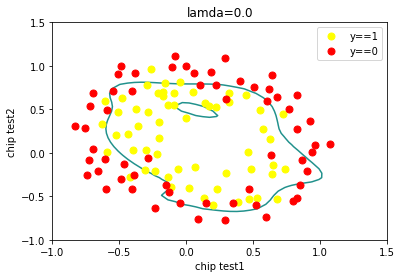

accuracy=85.59322033898306


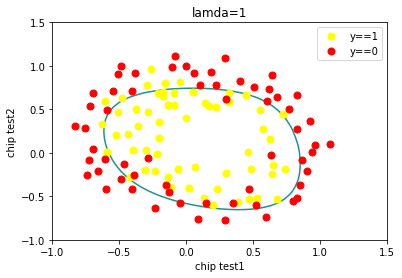

accuracy=83.05084745762711


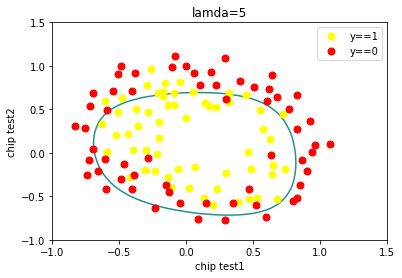

accuracy=81.35593220338984


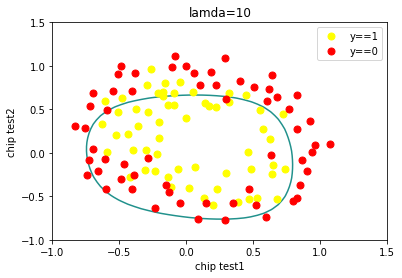

accuracy=74.57627118644068


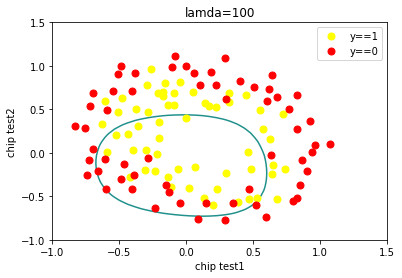

accuracy=61.016949152542374


In [40]:
for i in [0.00,1,5,10,100]:
    lamda=i
    temp=opt.fmin_tnc(func=costfunctionreg,fprime=Gradientreg,x0=intial_theta.flatten(),args=(X,Y,lamda))
    theta=temp[0]
    plotdecision(theta,lamda)
    pred=sigmoid(X@theta[:,np.newaxis])
    pred=pred>=0.5
    print(f"accuracy={np.mean(pred==Y[:,np.newaxis])*100}")

    

In [41]:
X.shape

(118, 28)